# Segmenting nuclei using deep learning
In case deep-learning based segmentation libraries such as [cellpose](https://github.com/MouseLand/cellpose) are installed, `bob` can also use this libraries. 
You may have to give another hint requesting to use this library specifically, or "use deep learning" more generally.

In [1]:
from bia_bob import bob
bob.__version__

'0.14.1'

In [2]:
%%bob 
load blobs.tif,
segment the bright blobs as if they 
were nuclei using deep learning
show the result using a curtain

I will load an image (`blobs.tif`), segment the bright blobs using deep learning, and then visualize the result using a curtain display.



In [3]:
from skimage.io import imread
import stackview
from cellpose import models
import numpy as np

# Step 1: Load the image
filename = 'blobs.tif'
image = imread(filename)

# Step 2: Segment the bright blobs using Cellpose
model = models.Cellpose(gpu=False, model_type='nuclei')
masks, flows, styles, diams = model.eval(image, diameter=None, channels=[0, 0])

# Step 3: Display the original image and the segmented image using a curtain display
stackview.curtain(image, masks)

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
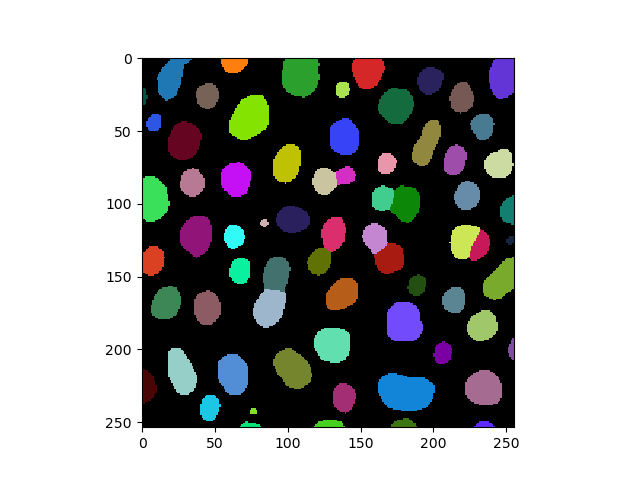

In [4]:
stackview.insight(masks.astype(np.uint32))